In [2]:
import pandas as pd
import numpy as np
from skimpy import clean_columns
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
import scipy.stats as stats
from datetime import timedelta

- No sig differences in biomass in field corn or soy
- No sig differences in stand loss in soy
- Sig higher stand count in fung-only field corn

In [5]:
stand = pd.read_csv('Data/stand_loss.csv')
stand

,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Section number,Plant growth stage,Stand count,Notes
0,Chloe Yi-Luo Cho,CHO_GEN,6/9/25,VE/V1,Soybean,Neonic,1,V1,88.0,NaN
1,Chloe Yi-Luo Cho,CHO_GEN,6/9/25,VE/V1,Soybean,Neonic,2,V1,89.0,NaN
2,Chloe Yi-Luo Cho,CHO_GEN,6/9/25,VE/V1,Soybean,Neonic,3,V1,85.0,NaN
3,Chloe Yi-Luo Cho,CHO_GEN,6/9/25,VE/V1,Soybean,Neonic,4,V1,90.0,NaN
4,Chloe Yi-Luo Cho,CHO_GEN,6/9/25,VE/V1,Soybean,Neonic,5,V1,94.0,NaN
...,...,...,...,...,...,...,...,...,...,...
931,Janice Degni,DEG_DIE_1,7/1/25,VE/V1,Field corn,Fung,5,VE/V1,25.0,NaN
932,Janice Degni,DEG_DIE_1,7/1/25,VE/V1,Field corn,Fung,6,VE/V1,26.0,NaN
933,Janice Degni,DEG_DIE_1,7/1/25,VE/V1,Field corn,Fung,7,VE/V1,26.0,NaN
934,Janice Degni,DEG_DIE_1,7/1/25,VE/V1,Field corn,Fung,8,VE/V1,27.0,NaN


In [6]:
biomass = pd.read_csv('Data/fresh_biomass.csv')
biomass

,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Section number,Plant growth stage,Number of plants,Total weight (g),Notes,Untared weight (g)
0,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,1,V3,15,79.7,NaN,NaN
1,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,2,V3,15,73.8,NaN,NaN
2,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,3,V3,15,73.4,NaN,NaN
3,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,4,V3,15,78.6,NaN,NaN
4,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,5,V3,15,97.7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
481,Janice Degni,DEG_LAF_2,6/30/2025,V3/V4,Soybean,Fung,5,V2/V3,15,105.0,NaN,NaN
482,Janice Degni,DEG_LAF_2,6/30/2025,V3/V4,Soybean,Fung,6,V2/V3,15,98.0,NaN,NaN
483,Janice Degni,DEG_LAF_2,6/30/2025,V3/V4,Soybean,Fung,7,V2/V3,15,98.0,NaN,NaN
484,Janice Degni,DEG_LAF_2,6/30/2025,V3/V4,Soybean,Fung,8,V2/V3,15,106.0,NaN,NaN


In [66]:
deli_cup = pd.read_csv('Data/deli_cup.csv')
deli_cup

,Container Number,Container Type,Project,Field ID,Treatment,Collection Date,Seed Type,Number Seeds,SCM Larvae Sum,SCM Pupae Sum,Phorid Seed,Other Damage,Wireworms,Other Seeds,Wireworm Presence/absence,Grub prsence/absence,Checked?,Ordered Entered,Notes
0,25_D_1592,DELI,R,MIL_ZIT_2,FUNG,6/10/25,FIELD CORN,7,0,0,0,0,0,0,NO,NO,Y,454,NaN
1,25_D_1596,DELI,R,MIL_ZIT_2,FUNG,6/10/25,FIELD CORN,8,0,0,0,0,0,0,NO,NO,Y,450,NaN
2,25_D_1638,DELI,R,DEG_FOU,NEONIC,6/10/25,FIELD CORN,8,0,0,0,0,0,0,NO,YES,Y,444,NaN
3,25_D_1115,DELI,R,SMI_ARN_1,NEONIC,5/21/25,FIELD CORN,10,0,0,0,0,0,0,NO,YES,Y,47,NaN
4,25_D_1199,DELI,R,CER_DEL_2,NEONIC,5/28/25,FIELD CORN,10,1,0,0,0,0,0,NO,NO,Y,290,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,25_D_1015,DELI,R,MIL_COB,NEONIC,5/15/25,SOY,26,0,0,0,0,0,0,NO,NO,Y,633,NaN
481,25_D_1009,DELI,R,MIL_COB,NEONIC,5/15/25,SOY,28,0,0,0,0,0,0,NO,NO,Y,627,NaN
482,25_D_1012,DELI,R,MIL_COB,NEONIC,5/15/25,SOY,28,0,0,0,0,0,0,NO,YES,Y,626,NaN
483,25_D_1003,DELI,R,MIL_COB,FUNG,5/15/25,SOY,31,0,0,0,0,0,0,NO,NO,Y,651,NaN


In [75]:
deli_cup['Total SCM'] = deli_cup['SCM Larvae Sum'] + deli_cup['SCM Pupae Sum']
field_deli_cup = deli_cup[deli_cup['Seed Type'] != 'SWEET CORN']

field_deli_cup['Treatment'] = field_deli_cup['Treatment'].replace({'NEONIC': 'Treated', 'FUNG': 'Untreated'})
field_deli_cup['Seed Type'] = field_deli_cup['Seed Type'].replace({'FIELD CORN': 'Field corn', 'SOY': 'Soybean'})
field_deli_cup = field_deli_cup.rename(columns={'Seed Type': 'Crop'})

field_deli_cup['Avg SCM'] = field_deli_cup['Total SCM'] / field_deli_cup['Number Seeds']


field_deli_cup

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_36382/3955949027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_deli_cup['Treatment'] = field_deli_cup['Treatment'].replace({'NEONIC': 'Treated', 'FUNG': 'Untreated'})
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_36382/3955949027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_deli_cup['Seed Type'] = field_deli_cup['Seed Type'].replace({'FIELD CORN': 'Field corn', 'SOY': 'Soybean'})


,Container Number,Container Type,Project,Field ID,Treatment,Collection Date,Crop,Number Seeds,SCM Larvae Sum,SCM Pupae Sum,...,Other Damage,Wireworms,Other Seeds,Wireworm Presence/absence,Grub prsence/absence,Checked?,Ordered Entered,Notes,Total SCM,Avg SCM
0,25_D_1592,DELI,R,MIL_ZIT_2,Untreated,6/10/25,Field corn,7,0,0,...,0,0,0,NO,NO,Y,454,NaN,0,0.0
1,25_D_1596,DELI,R,MIL_ZIT_2,Untreated,6/10/25,Field corn,8,0,0,...,0,0,0,NO,NO,Y,450,NaN,0,0.0
2,25_D_1638,DELI,R,DEG_FOU,Treated,6/10/25,Field corn,8,0,0,...,0,0,0,NO,YES,Y,444,NaN,0,0.0
3,25_D_1115,DELI,R,SMI_ARN_1,Treated,5/21/25,Field corn,10,0,0,...,0,0,0,NO,YES,Y,47,NaN,0,0.0
4,25_D_1199,DELI,R,CER_DEL_2,Treated,5/28/25,Field corn,10,1,0,...,0,0,0,NO,NO,Y,290,NaN,1,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,25_D_1015,DELI,R,MIL_COB,Treated,5/15/25,Soybean,26,0,0,...,0,0,0,NO,NO,Y,633,NaN,0,0.0
481,25_D_1009,DELI,R,MIL_COB,Treated,5/15/25,Soybean,28,0,0,...,0,0,0,NO,NO,Y,627,NaN,0,0.0
482,25_D_1012,DELI,R,MIL_COB,Treated,5/15/25,Soybean,28,0,0,...,0,0,0,NO,YES,Y,626,NaN,0,0.0
483,25_D_1003,DELI,R,MIL_COB,Untreated,5/15/25,Soybean,31,0,0,...,0,0,0,NO,NO,Y,651,NaN,0,0.0


Text(0, 0.5, 'Average SCM/seed')

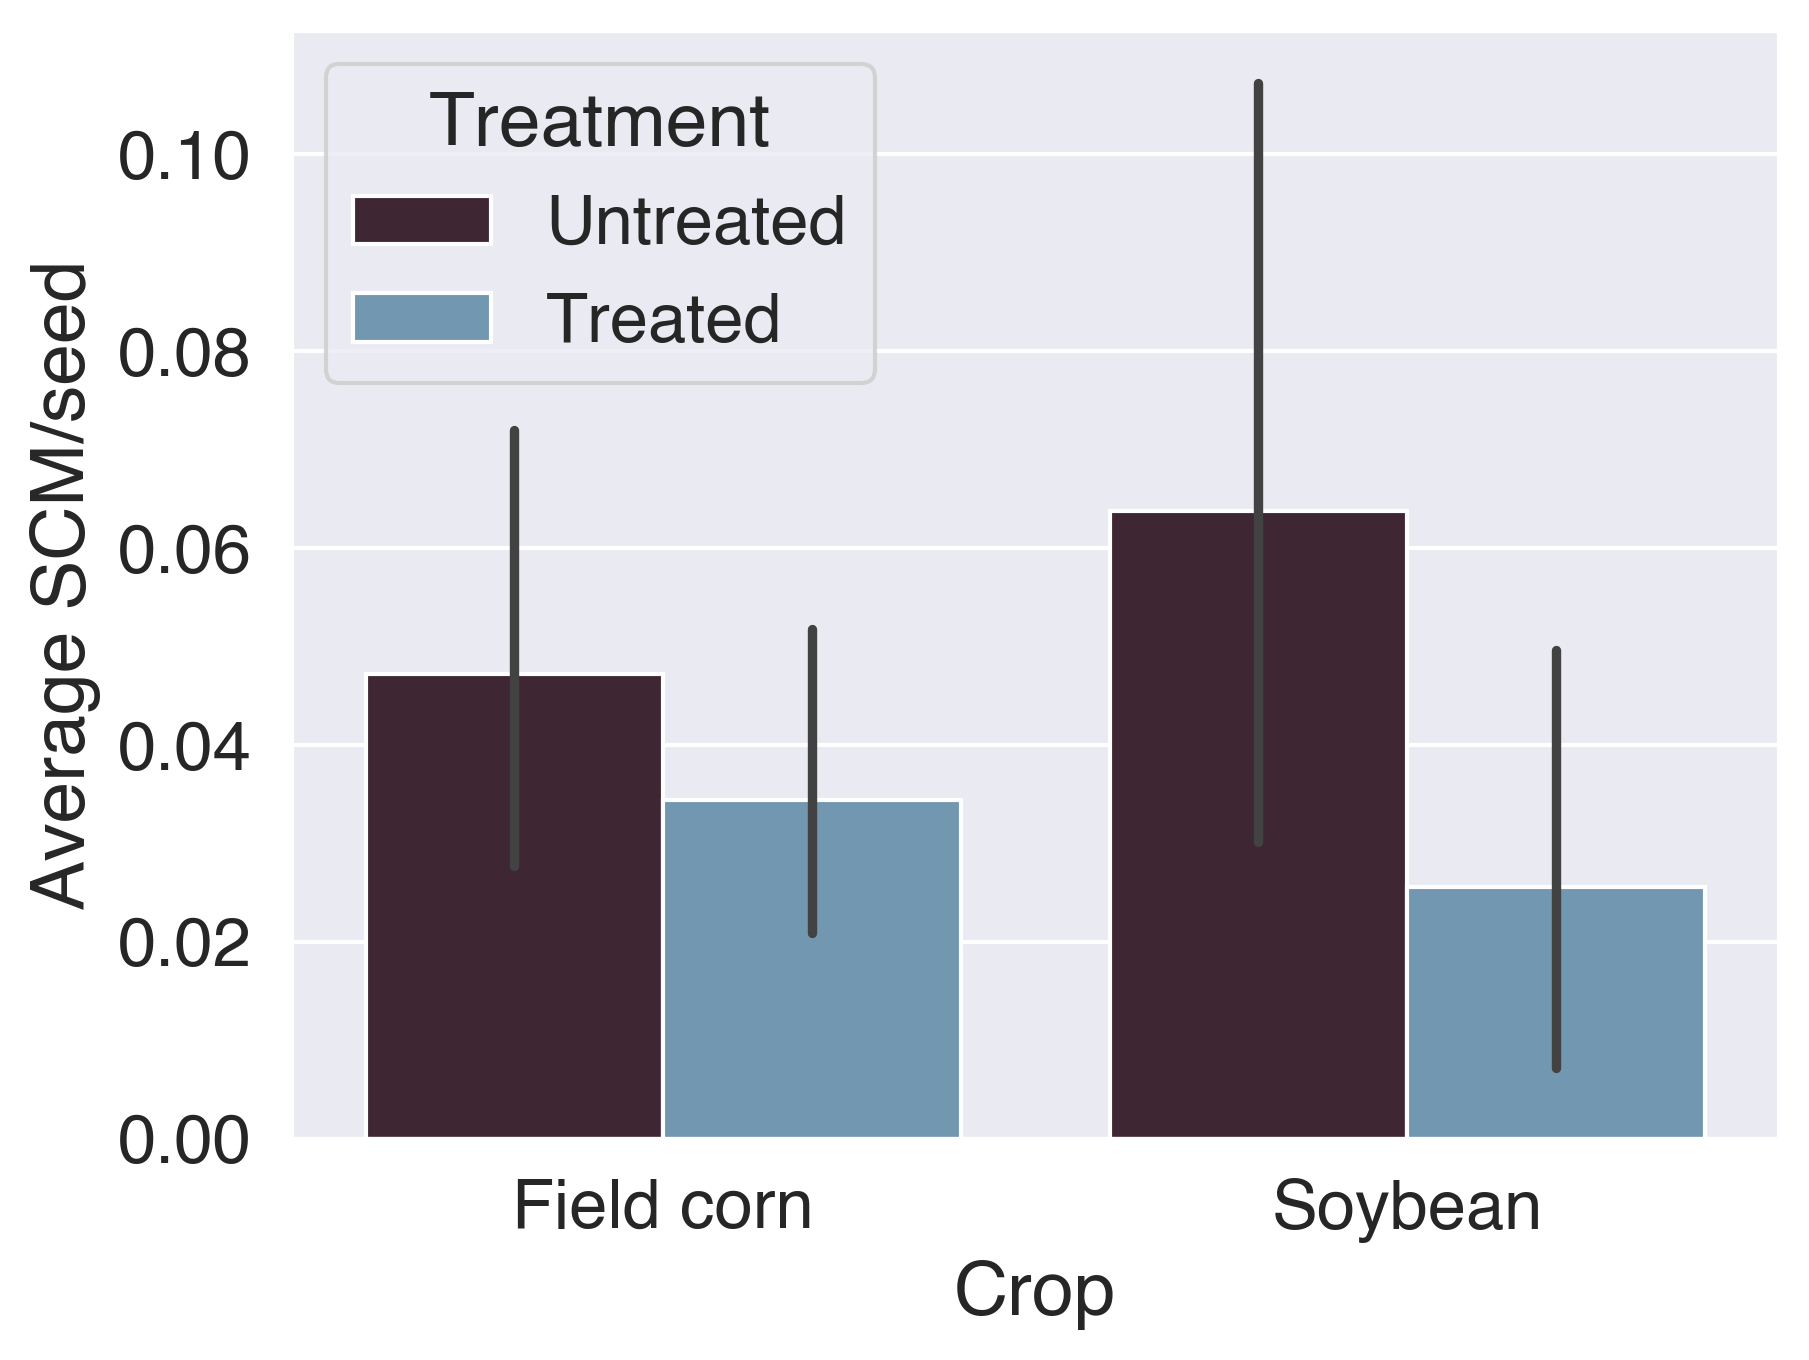

In [77]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Helvetica", font_scale=1.5)

palette = ['#432233', '#6899ba']
sns.barplot(data = field_deli_cup, x = 'Crop', y = 'Avg SCM', hue = 'Treatment', palette=palette)
plt.ylabel('Average SCM/seed')

In [79]:
corn_deli = field_deli_cup[field_deli_cup['Crop'] == 'Field corn']
soy_deli = field_deli_cup[field_deli_cup['Crop'] == 'Soybean']


In [84]:
np.mean(corn_deli['Avg SCM'])

0.04067046398979172

In [85]:
np.mean(soy_deli['Avg SCM'])

0.04468770855610918

In [80]:
t1 = corn_deli[corn_deli['Treatment'] == 'Treated']['Avg SCM']
t2 = corn_deli[corn_deli['Treatment'] == 'Untreated']['Avg SCM']
stats.ttest_ind(t1, t2)

TtestResult(statistic=-0.9434605031446335, pvalue=0.3461897014126504, df=306.0)

In [81]:
t1 = soy_deli[soy_deli['Treatment'] == 'Treated']['Avg SCM']
t2 = soy_deli[soy_deli['Treatment'] == 'Untreated']['Avg SCM']
stats.ttest_ind(t1, t2)

TtestResult(statistic=-1.7385970098696044, pvalue=0.0839597450234653, df=166.0)

In [40]:
field_crop_stand = stand[stand['Crop'] != 'Sweet corn']
field_crop_stand

,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Section number,Plant growth stage,Stand count,Notes
0,Chloe Yi-Luo Cho,CHO_GEN,6/9/25,VE/V1,Soybean,Neonic,1,V1,88.0,NaN
1,Chloe Yi-Luo Cho,CHO_GEN,6/9/25,VE/V1,Soybean,Neonic,2,V1,89.0,NaN
2,Chloe Yi-Luo Cho,CHO_GEN,6/9/25,VE/V1,Soybean,Neonic,3,V1,85.0,NaN
3,Chloe Yi-Luo Cho,CHO_GEN,6/9/25,VE/V1,Soybean,Neonic,4,V1,90.0,NaN
4,Chloe Yi-Luo Cho,CHO_GEN,6/9/25,VE/V1,Soybean,Neonic,5,V1,94.0,NaN
...,...,...,...,...,...,...,...,...,...,...
931,Janice Degni,DEG_DIE_1,7/1/25,VE/V1,Field corn,Fung,5,VE/V1,25.0,NaN
932,Janice Degni,DEG_DIE_1,7/1/25,VE/V1,Field corn,Fung,6,VE/V1,26.0,NaN
933,Janice Degni,DEG_DIE_1,7/1/25,VE/V1,Field corn,Fung,7,VE/V1,26.0,NaN
934,Janice Degni,DEG_DIE_1,7/1/25,VE/V1,Field corn,Fung,8,VE/V1,27.0,NaN


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_36382/1789197111.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_crop_stand['Treatment'] = field_crop_stand['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})


(0.0, 120.0)

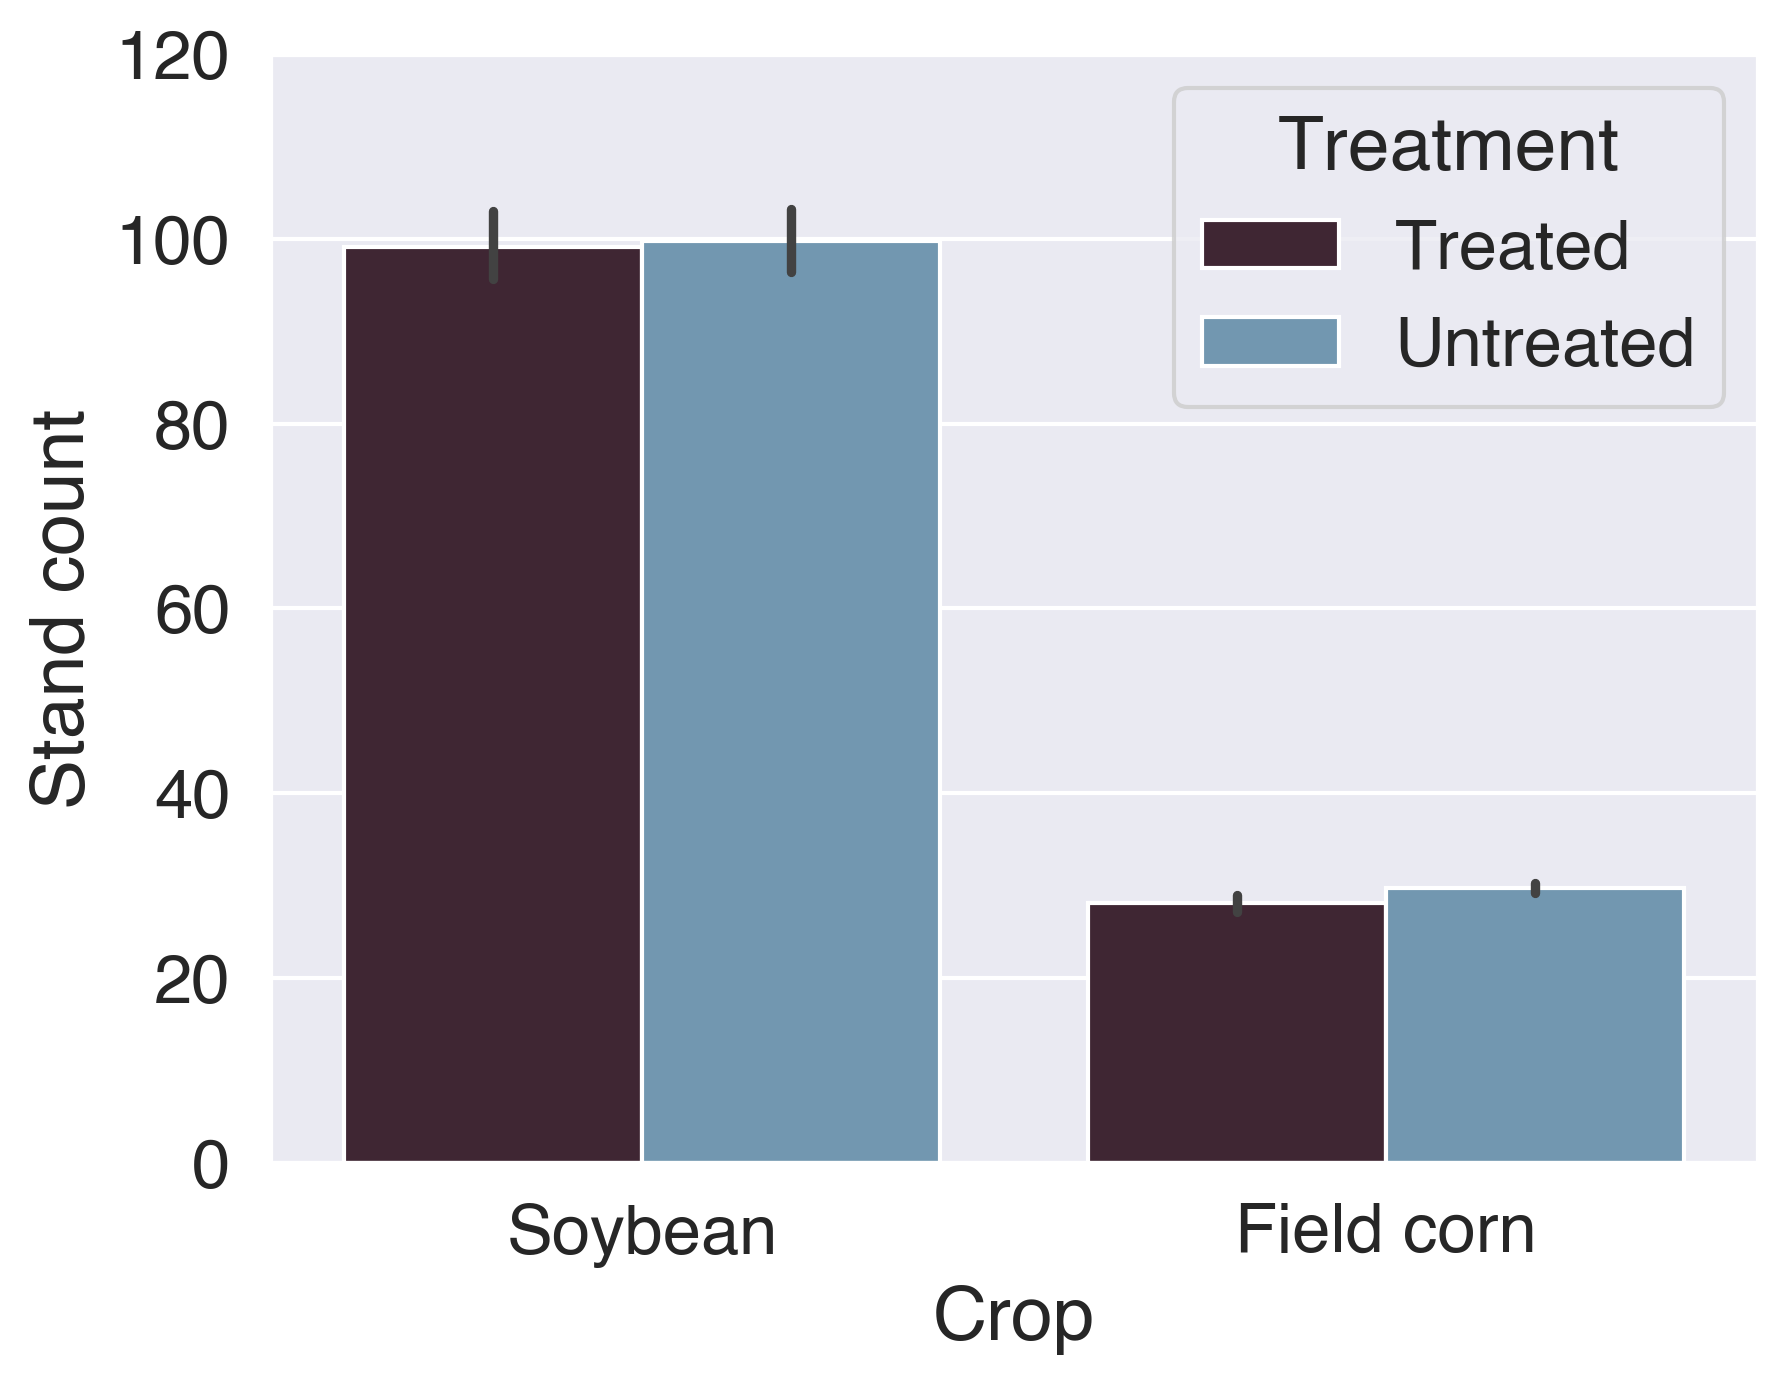

In [61]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Helvetica", font_scale=1.5)

field_crop_stand['Treatment'] = field_crop_stand['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})

palette = ['#432233', '#6899ba']
sns.barplot(data = field_crop_stand, x = 'Crop', y = 'Stand count', hue = 'Treatment', palette=palette)
plt.ylim(0, 120)


In [10]:
corn_stand = stand[stand['Crop'] == 'Field corn']
soy_stand = stand[stand['Crop'] == 'Soybean']


In [13]:
t1 = corn_stand[corn_stand['Treatment'] == 'Neonic']['Stand count']
t2 = corn_stand[corn_stand['Treatment'] == 'Fung']['Stand count']
stats.ttest_ind(t1, t2)

TtestResult(statistic=-2.869233460111234, pvalue=0.004282028130021058, df=520.0)

In [15]:
t1 = soy_stand[soy_stand['Treatment'] == 'Neonic']['Stand count']
t2 = soy_stand[soy_stand['Treatment'] == 'Fung']['Stand count']
stats.ttest_ind(t1, t2)

TtestResult(statistic=-0.25762590145461506, pvalue=0.7968933425703615, df=268.0)

<Axes: xlabel='Treatment', ylabel='Stand count'>

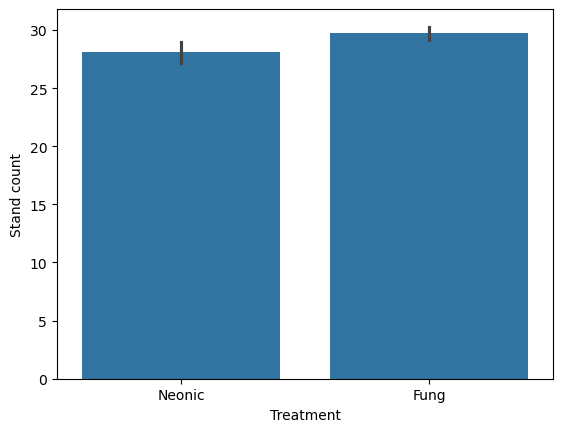

In [16]:
sns.barplot(data = corn_stand, x = 'Treatment', y = 'Stand count')

<Axes: xlabel='Treatment', ylabel='Total weight (g)'>

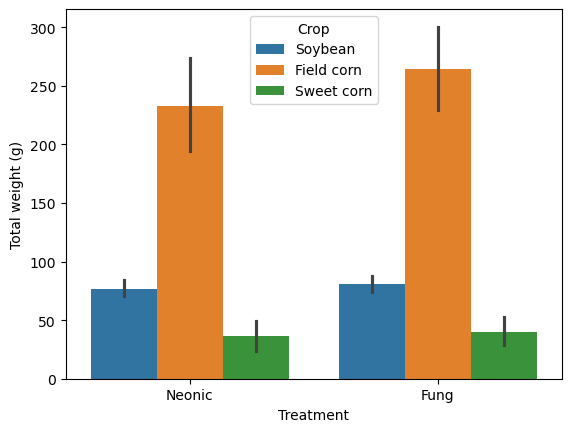

In [18]:
sns.barplot(data = biomass, x = 'Treatment', y = 'Total weight (g)', hue = 'Crop')

In [19]:
corn_biomass = biomass[biomass['Crop'] == 'Field corn']
soy_biomass = biomass[biomass['Crop'] == 'Soybean']


In [25]:
t1 = corn_biomass[corn_biomass['Treatment'] == 'Neonic']['Total weight (g)']
t2 = corn_biomass[corn_biomass['Treatment'] == 'Fung']['Total weight (g)']
stats.ttest_ind(t1.dropna(), t2.dropna())

TtestResult(statistic=-1.1629300984800512, pvalue=0.24589617382427587, df=267.0)

In [26]:
t1 = soy_biomass[soy_biomass['Treatment'] == 'Neonic']['Total weight (g)']
t2 = soy_biomass[soy_biomass['Treatment'] == 'Fung']['Total weight (g)']
stats.ttest_ind(t1.dropna(), t2.dropna())

TtestResult(statistic=-0.741815912370436, pvalue=0.45942405463344327, df=142.0)

In [48]:
field_crop_biomass = biomass[biomass['Crop'] != 'Sweet corn']
field_crop_biomass

,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Section number,Plant growth stage,Number of plants,Total weight (g),Notes,Untared weight (g)
0,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,1,V3,15,79.7,NaN,NaN
1,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,2,V3,15,73.8,NaN,NaN
2,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,3,V3,15,73.4,NaN,NaN
3,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,4,V3,15,78.6,NaN,NaN
4,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,5,V3,15,97.7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
481,Janice Degni,DEG_LAF_2,6/30/2025,V3/V4,Soybean,Fung,5,V2/V3,15,105.0,NaN,NaN
482,Janice Degni,DEG_LAF_2,6/30/2025,V3/V4,Soybean,Fung,6,V2/V3,15,98.0,NaN,NaN
483,Janice Degni,DEG_LAF_2,6/30/2025,V3/V4,Soybean,Fung,7,V2/V3,15,98.0,NaN,NaN
484,Janice Degni,DEG_LAF_2,6/30/2025,V3/V4,Soybean,Fung,8,V2/V3,15,106.0,NaN,NaN


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_36382/3657390541.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_crop_biomass['Treatment'] = field_crop_biomass['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_36382/3657390541.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_crop_biomass['Avg weight'] = field_crop_biomass['Total weight (g)'] / 15


Text(0, 0.5, 'Average weight/plant (g)')

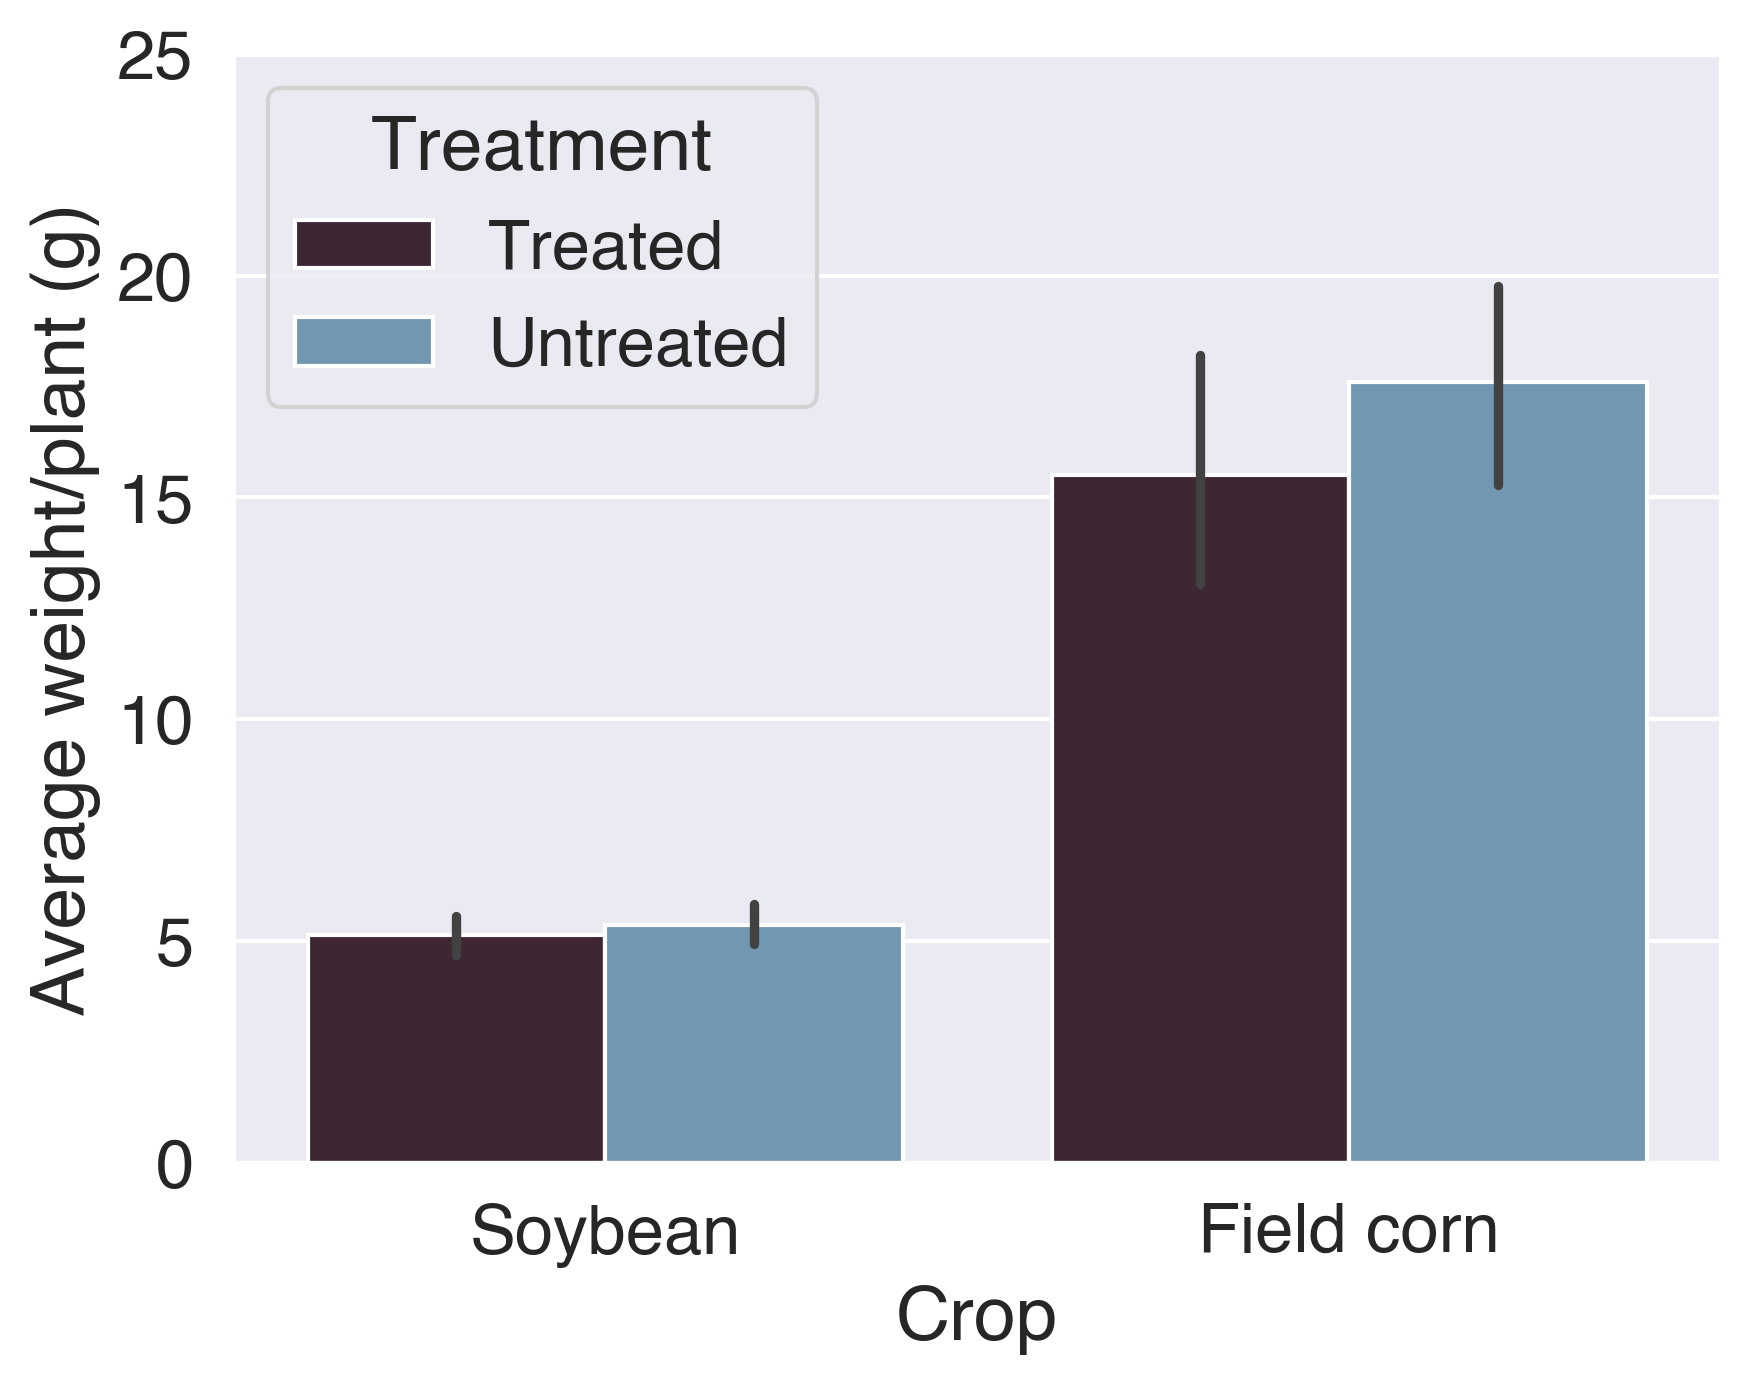

In [62]:
sns.set(font="Helvetica", font_scale=1.5)
plt.rcParams.update({"figure.dpi": 300})


field_crop_biomass['Treatment'] = field_crop_biomass['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
field_crop_biomass['Avg weight'] = field_crop_biomass['Total weight (g)'] / 15


palette = ['#432233', '#6899ba']
sns.barplot(data = field_crop_biomass, x = 'Crop', y = 'Avg weight', hue = 'Treatment', palette=palette)
plt.ylim(0, 25)
plt.ylabel('Average weight/plant (g)')
